In [1]:
##### 4.4 배열 데이터의 파일 입출력 #####
# numpy는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있다.

In [8]:
# np.save와 np.load는 배열 데이터를 효과적으로 디스크에 저장하고 불러오기 위한 함수이다.
# 배열은 기본적으로 압축되지 않은 원시 바이너리 형식의 .npy 파일로 저장된다.

import numpy as np

In [4]:
arr = np.arange(10)

In [5]:
np.save('some_array', arr)

In [6]:
# 저장되는 파일 경로가 .npy로 끝나지 않으면 자동적으로 확장자가 추가된다.
# 이렇게 저장된배열은 np.load를 이용해 불러올 수 있다.

np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# np.savez 함수를 이용하면 여러 개의 배열을 압축된 형식으로 저장할 수 있는데, 저장하려는 배열을 키워드 인자 형태로 전달한다.

np.savez('array_archive.npz', a=arr, b=arr)

In [10]:
# npz 파일을 불러올 때는 각각의 배열이 필요할 때 불러올 수 있도록 사전 형식의 객체에 저장한다.

arch = np.load('array_archive.npz')

In [11]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# 압축이 잘되는 형식의 데이터라면 대신 numpy.savez_compressed를 사용하자.

np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [13]:
##### 4.5 선형대수 #####
# 두 개의 2차원 배열을 * 연산자로 곱하면 행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산한다.
# 행렬 곱셈은 배열 메서드이자 numpy 네임스페이스 안에 있는 dot 함수를 이용해서 계산한다.

x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [16]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [18]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [20]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [21]:
# x.dot(y)는 np.dot(x,y)와 동일하다.

np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [23]:
# 2차원 배열과 곱셈이 가능한 크기의 1차원 배열 간의 행렬 곱셈의 결과는 1차원 배열이다.

np.dot(x, np.ones(3))

array([ 6., 15.])

In [24]:
# 행렬곱셈

x @ np.ones(3)

array([ 6., 15.])

In [9]:
# numpy.linalg : 행렬의 분할, 역행렬, 행렬식 등을 포함하고 있다.

from numpy.linalg import inv, qr

In [35]:
X = np.random.randn(5, 5)

In [36]:
# X.T.의 전치행렬과 X의 곱

mat = X.T.dot(X)

In [28]:
# inv : 정사각행렬의 역행렬 계산

inv(mat)

array([[  42.30358507,   81.34143317,  -84.35147213,  -40.88050991,
          19.90584362],
       [  81.34143317,  157.97984326, -163.58923984,  -79.11071376,
          38.20879903],
       [ -84.35147213, -163.58923984,  170.01690385,   82.09694127,
         -39.66911288],
       [ -40.88050991,  -79.11071376,   82.09694127,   39.83068897,
         -19.23702907],
       [  19.90584362,   38.20879903,  -39.66911288,  -19.23702907,
           9.5416661 ]])

In [37]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  0.00000000e+00, -2.77555756e-17,
         0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  1.00000000e+00, -8.32667268e-17,
        -4.44089210e-16,  4.44089210e-16],
       [ 8.32667268e-17,  0.00000000e+00,  1.00000000e+00,
         2.22044605e-16,  0.00000000e+00],
       [ 5.55111512e-17,  1.11022302e-16,  0.00000000e+00,
         1.00000000e+00,  2.22044605e-16],
       [-3.33066907e-16,  0.00000000e+00,  5.55111512e-17,
        -8.88178420e-16,  1.00000000e+00]])

In [38]:
# qr : QR 분해 계산

q, r = qr(mat)

In [39]:
r

array([[-2.56395844, -3.60852191, -1.40652982,  1.77113361,  4.17528447],
       [ 0.        , -6.56575122,  0.74984938, -1.16317278,  2.66838619],
       [ 0.        ,  0.        , -1.47662442,  0.15957095,  0.39303467],
       [ 0.        ,  0.        ,  0.        , -1.63301628, -2.56356379],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.7177471 ]])

In [40]:
##### 4.6 난수생성 #####
# numpy.random 모듈은 파이썬 내장 random 함수를 보강하여 다양한 종류의 확률 분포로부터 표본값을 생성하는데 사용된다.

In [41]:
# 표준정규분포로부터 4x4 크기의 표본 생성

samples = np.random.normal(size=(4,4))

In [42]:
samples

array([[ 0.56893993, -1.80576013, -0.86374894, -0.36757656],
       [-2.13071401,  1.0868688 ,  0.31180232, -1.26350223],
       [-0.44966888, -0.70463793,  1.12397047, -0.04421759],
       [-1.64168646, -0.95685086,  1.4363442 ,  0.36215554]])

In [10]:
# 이에비해 파이썬 내장 random 모듈은 한 번에 하나의 값만 생성할 수 있다.
# numpy.random은 매우 큰 표본을 생성하는데 파이썬 내장 모듈보다 수십 배 이상 빠르다.

from random import normalvariate

In [44]:
N = 1000000

In [45]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

3.46 s ± 935 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit np.random.normal(size=N)

96 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
# 엄밀하게는 유사 난수라고 하는데, 난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생성하기 때문이다.

In [49]:
# numpy 난수 생성기의 시드값은 no.random.seed를 이용해 변경할 수 있다.

np.random.seed(1234)

In [1]:
##### 4.7 계단오르내리기 예제 #####
# 배열 연산의 활용을 보여주는 간단한 어플리케이션이다.
# 계단 중간에서 같은 확률로 한 계단 올라가거나 내려간다고 가정하자.

In [27]:
# 순수 파이썬으로 내장 random 모듈을 사용해 계단 오르내리기를 1000번 수행하는 코드는 다음처럼 작성할 수 있다.

import random

In [28]:
position = 0

In [29]:
walk = [position]

In [30]:
steps = 1000

In [31]:
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [36]:
# 100회 계단 오르내리기를 한 것을 나타내는 그래프
# walk는 계단을 오르거나(+1) 내려간(-1) 누적합인것을 알 수 있다.

import matplotlib.pyplot as plt

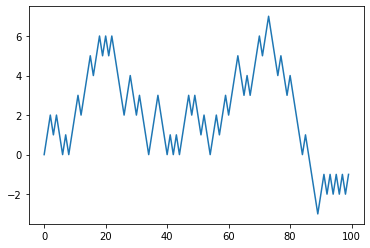

In [37]:
plt.plot(walk[:100])

In [43]:
# np.random 모듈을 사용해서 1000번 수행한 결과(-1, 1)를 한 번에 저장하고 누적합을 계산한다.

nsteps = 1000

In [40]:
draws = np.random.randint(0, 2, size=nsteps)

In [41]:
steps = np.where(draws > 0, 1, -1)

In [46]:
# 이것으로 계단 오르내린 위치의 최솟값과 최댓값 같은 간단한 통계를 구할 수 있다.

walk = steps.cumsum()

In [44]:
walk.min()

-10

In [45]:
walk.max()

4

In [50]:
# 계단의 처음 위치에서 최초로 10칸 떨어지기는 얼마나 걸렸는지 확인해보자
# (np.abs(walk) >= 10)에서 최초로 10칸 떨어진 시점을 알려주는 불리언 배열을 얻을 수 있다.
# 불리언 배열에서 최댓값의 처음 색인을 반환하는 argmax를 사용했다. (True가 최댓값)

(np.abs(walk) >= 10).argmax()

89

In [51]:
##### 4.7.1 한 번에 시뮬레이션하기 #####
# 계단오르내리기를 많은 횟수를 시뮬레이션 하더라도 위 코드를 조금만 수정하면 해결할 수 있다.
# np.random 함수에 크기가 2인 튜플을 넘기면 2차원 배열이 생성되고
# 각 컬럼에서 누적합을 구해 5000회의 시뮬레이션을 한 번에 처리할 수 있다.

In [52]:
nwalks = 5000

In [53]:
nsteps = 1000

In [54]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

In [55]:
steps = np.where(draws > 0, 1, -1)

In [56]:
walks = steps.cumsum(1)

In [57]:
walks

array([[  1,   0,  -1, ...,  -2,  -1,  -2],
       [ -1,   0,   1, ..., -44, -45, -44],
       [  1,   0,   1, ..., -42, -41, -42],
       ...,
       [ -1,  -2,  -3, ..., -24, -25, -24],
       [ -1,  -2,  -1, ...,  42,  43,  42],
       [  1,   2,   3, ...,  50,  49,  50]], dtype=int32)

In [58]:
walks.max()

131

In [59]:
walks.min()

-109

In [60]:
# 누적합이 30 혹은 -30이 되는 최소 시점을 계산해보자.
# 5000회의 시뮬레이션 중 모든 경우가 30에 도달하지 않더라도 any 메서드를 이용하면 해결 가능하다.

hits30 = (np.abs(walks) >= 30).any(1)

In [61]:
hits30

array([False,  True,  True, ...,  True,  True,  True])

In [63]:
# 누적합이 30 또는 -30이 되는 경우의 수

hits30.sum()

3395

In [64]:
# 불리언 배열을 사용해 walks에서 컬럼을 선택하고
# 절댓값이 30이 넘는 경우에 대해 축 1의 argmax를 구하면 처음 위치에서 30칸 이상 멀어지는 최소 횟수를 구할 수 있다.

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

In [65]:
crossing_times

array([385, 667, 655, ..., 283, 761, 461], dtype=int32)

In [66]:
# normal 함수에 표준편차와 평균값을 넣어 정규분포에서 표본을 추출하는 것처럼 그냥 다른 난수 발생 함수를 사용하기만 하면 된다.

steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

In [67]:
steps

array([[ 0.13622546,  0.04268509, -0.10046932, ...,  0.49828331,
        -0.25552801, -0.168963  ],
       [-0.21294318, -0.03109904,  0.25873283, ..., -0.22622878,
        -0.08596741, -0.18391178],
       [ 0.10447933,  0.12804537, -0.24329188, ...,  0.07865584,
         0.31724664,  0.07835923],
       ...,
       [ 0.1673046 ,  0.04541258,  0.0401669 , ..., -0.16690995,
        -0.14308119,  0.17185195],
       [ 0.2160558 , -0.66944636, -0.15937787, ...,  0.2612777 ,
        -0.01599155, -0.10381578],
       [-0.19347194, -0.27396321,  0.24601087, ..., -0.1819682 ,
         0.11320632, -0.38260543]])